In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np

In [2]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [3]:
X

array([[-7.94236015, -6.87757956],
       [-3.28990983, -3.64809749],
       [-3.56176662, -4.32271492],
       ...,
       [-0.29729042,  4.01474418],
       [-9.36657597, -7.97372653],
       [-1.12443441,  4.21492992]])

In [4]:
y

array([1, 2, 2, 1, 1, 0, 2, 0, 2, 2, 1, 2, 0, 1, 0, 2, 2, 2, 2, 2, 0, 2,
       2, 0, 2, 0, 2, 2, 1, 1, 2, 0, 0, 2, 0, 2, 0, 0, 1, 0, 1, 0, 2, 1,
       0, 2, 2, 2, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 0, 0, 2, 2, 0, 1, 2,
       1, 0, 2, 0, 0, 0, 0, 1, 2, 0, 1, 1, 0, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       2, 2, 0, 0, 2, 0, 1, 1, 1, 2, 2, 2, 0, 2, 1, 0, 0, 2, 0, 2, 2, 2,
       2, 0, 1, 1, 0, 0, 0, 0, 2, 1, 1, 1, 2, 0, 1, 1, 2, 1, 0, 2, 1, 1,
       0, 0, 2, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 2, 1, 0, 0, 0, 0,
       2, 2, 2, 0, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 0, 1, 1, 1, 1,
       2, 1, 0, 2, 1, 1, 0, 0, 0, 2, 1, 0, 1, 1, 0, 1, 1, 0, 1, 2, 1, 2,
       2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1,
       1, 0, 0, 0, 0, 1, 0, 2, 2, 1, 0, 0, 0, 0, 0, 1, 2, 2, 1, 2, 1, 0,
       1, 0, 2, 1, 1, 2, 2, 1, 2, 0, 2, 1, 2, 2, 2, 2, 0, 2, 0, 1, 2, 0,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 0, 2, 2, 0, 1, 0, 0, 2, 2, 2, 2, 2,
       1, 0, 2, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 2, 1,

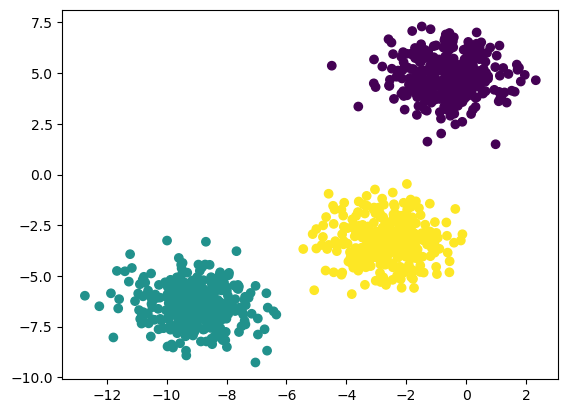

In [5]:
plt.scatter(X[:,0],X[:,1],c=y)

In [6]:
## Standardization -- feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [9]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [10]:
from sklearn.cluster import KMeans

In [11]:
# Elbow method to select k value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [12]:
wcss

[1339.9999999999995,
 414.17730423286173,
 75.974618220961,
 66.17352814920596,
 55.90382219147041,
 45.93415235923091,
 49.077126750212074,
 37.739589098603346,
 34.20361227841874,
 30.827263942234254]

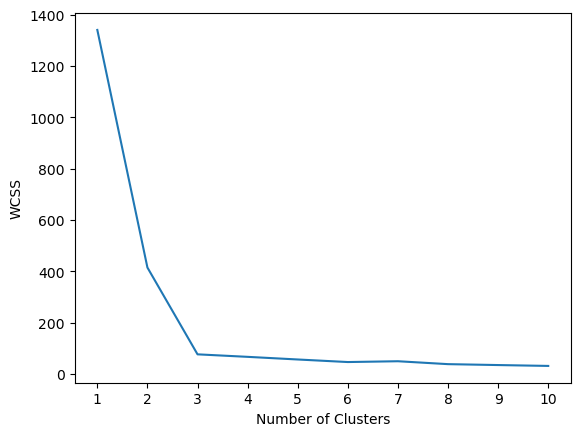

In [13]:
# plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
kmeans=KMeans(n_clusters=3,init='k-means++')

In [15]:
kmeans.fit_predict(X_train_scaled)

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 2, 1, 2, 0, 2, 2, 0, 2,
       2, 2, 0, 0, 0, 1, 2, 2, 1, 1, 0, 1, 1, 0, 1, 2, 0, 2, 0, 2, 0, 0,
       1, 2, 0, 0, 2, 1, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1, 1, 2, 2, 1, 0, 0,
       2, 1, 0, 2, 1, 2, 0, 1, 1, 0, 0, 2, 0, 1, 0, 2, 1, 1, 2, 2, 1, 1,
       2, 0, 1, 0, 0, 2, 0, 2, 0, 1, 2, 1, 1, 0, 0, 0, 0, 2, 2, 0, 1, 0,
       2, 2, 2, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 0, 1, 1, 1, 0, 0, 2, 1, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 2,
       1, 0, 1, 0, 0, 1, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 0, 0, 0, 2, 2, 0,
       1, 1, 2, 0, 1, 2, 0, 1, 2, 1, 2, 1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 2,
       0, 2, 2, 1, 2, 1, 2, 0, 2, 2, 1, 2, 0, 1, 1, 2, 2, 1, 0, 2, 0, 1,
       2, 1, 2, 1, 0, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 0, 2, 2, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 2, 2, 0, 2, 0, 0, 0, 1, 2, 0,
       2, 1, 2, 0, 0, 0, 1, 0, 0, 1, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 1, 1, 2, 2, 0, 2, 1, 1, 0, 1, 2, 2, 1,

In [16]:
y_pred=kmeans.predict(X_test_scaled)

In [17]:
y_pred

array([1, 2, 0, 0, 0, 0, 2, 0, 1, 0, 2, 0, 0, 2, 1, 1, 2, 2, 2, 0, 0, 0,
       1, 2, 0, 0, 1, 0, 0, 2, 2, 2, 0, 2, 2, 1, 0, 0, 1, 2, 1, 0, 2, 1,
       1, 2, 1, 2, 1, 1, 2, 1, 0, 1, 2, 1, 2, 0, 2, 2, 1, 2, 2, 0, 2, 0,
       0, 1, 2, 2, 1, 0, 1, 1, 2, 2, 1, 2, 1, 2, 1, 0, 1, 2, 0, 2, 0, 0,
       0, 1, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 1, 1, 2, 1, 0, 2, 0, 2, 1, 0,
       0, 0, 2, 2, 1, 0, 2, 1, 2, 2, 1, 1, 0, 2, 1, 0, 2, 2, 2, 0, 1, 2,
       0, 1, 1, 1, 0, 1, 2, 2, 2, 1, 2, 1, 0, 0, 1, 1, 2, 1, 0, 0, 0, 1,
       2, 2, 0, 2, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 2, 0, 1, 1, 1, 2, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 0, 2, 2, 0, 1, 1, 0, 2, 2, 0,
       2, 2, 0, 0, 2, 0, 2, 1, 0, 2, 1, 0, 1, 2, 1, 2, 2, 2, 1, 0, 1, 0,
       2, 2, 2, 0, 2, 1, 1, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0, 2, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 2, 0, 0, 2, 1, 0, 1, 1,
       1, 2, 1, 0, 0, 2, 2, 1, 0, 1, 2, 1, 0, 2, 0, 0, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 0, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2,

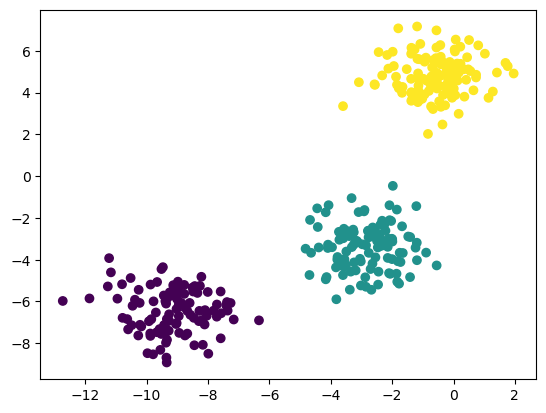

In [18]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [19]:
# Validating the k value
# 1-kneelocator
# 2-silhoutte scoring

In [20]:
## kneelocator
!pip install kneed

In [21]:
from kneed import KneeLocator

In [22]:
kl=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')

In [23]:
kl.elbow

3

In [24]:
# Silhoutte score
from sklearn.metrics import silhouette_score

In [25]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

In [26]:
silhouette_coefficients

[0.6060001051857923,
 0.7580190429808259,
 0.6021216230513062,
 0.47242067893589235,
 0.4604791104058926,
 0.34651498009682685,
 0.3276725452217417,
 0.3265160193614715,
 0.32052162773479276]

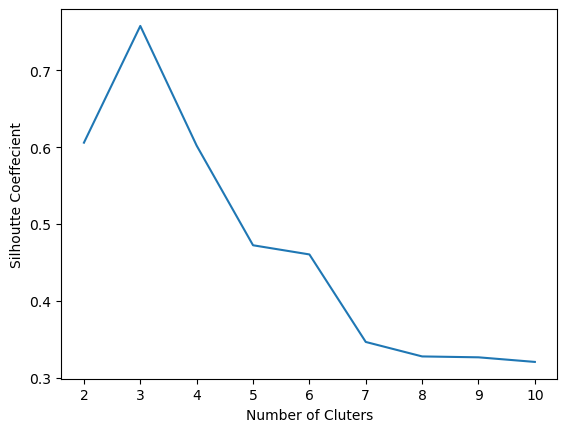

In [27]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()